# Jupyter structure

## Jupyter Cells

In jupyter, the execution block is a cell.  A cell can have different types of content (e.g. python code, markdown text), and Jupyter will know how to execute the code

Cells have two modes - edit mode or select mode.  In edit mode, we write into the cell (e.g. writing code or text).  In select mode we can organize cells, e.g.
- add new cells
- delete cells
- copy cells
- move cells around
for example:

In [ ]:
a = 'hello world' # we are going to copy this cell and paste it

Once you have added stuff to a cell, you can run them in a few different ways:
- **shift + return**: run a cell and advance to the next one
- **ctrl + return**: run a cell and stay on the same cell
- **Run menu**: run all cells below, run all cells above, or run all cells
e.g.

In [ ]:
def add(a, b):
    return a + b

add(1, 2)

Jupyter is interesting in that it's very **interactive**, therefore code doesn't have to run in the same sequence as what is written.  This allows the user to explore and iterate on cells.

However, to keep track of the order that code has been executed, you can see that there are these `[]` beside each cell.  These `[]` will show the order in which code is executed, and will increment on **every** execution, even if you are running the same cell twice

## Working with python

Working with python in jupyter is like working with a script, but far more interactive.  You can do exactly the same things you can do in a script.  Keep in mind cells are execution blocks, so everything within the same cell will be executed together.

For example, we can import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


Now we've imported libraries, we can use the libraries in other cells, for example

In [2]:
df = pd.DataFrame({'x': np.linspace(1, 100, 100), 'y': np.random.randn(100)})

<AxesSubplot:xlabel='x'>

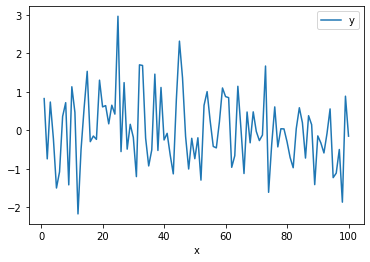

In [3]:
df.set_index('x').plot()

## Getting data

Getting data in jupyter is just writing query code.  We'll be going over a variety of data in the class, but as an example, here is a simple way to pull json data directly from a source

In [4]:
import requests
import pandas as pd

In [5]:
res = requests.get(
    'https://api.cryptowat.ch/markets/coinbase-pro/btcusd/ohlc',
    params={
        'periods': '3600',
        'after': str(int(pd.Timestamp('2021-12-01').timestamp()))
    }
)

In [ ]:
res.json()

In [8]:
df = pd.DataFrame(
    res.json()['result']['3600'],
    columns=['ts', 'open', 'high', 'low', 'close', 'volumeBTC', 'volumeUSD']
)
df['ts'] = pd.to_datetime(df.ts, unit='s')


In [9]:
df.head()

,ts,open,high,low,close,volumeBTC,volumeUSD
0,2021-12-01 00:00:00,57321.41,57451.05,56814.34,56987.97,388.482022,2.218430e+07
1,2021-12-01 01:00:00,56998.35,57726.45,56705.06,57616.41,599.791578,3.437153e+07
2,2021-12-01 02:00:00,57618.55,57620.00,56972.97,57030.83,591.687200,3.387067e+07
3,2021-12-01 03:00:00,57029.79,57396.87,56841.01,57307.59,702.560364,4.007816e+07
4,2021-12-01 04:00:00,57306.55,57456.82,57026.11,57404.01,859.591535,4.920503e+07


Plotting resulting data is also pretty easy, we can use pandas' convenience plotting as an example:

<AxesSubplot:xlabel='ts'>

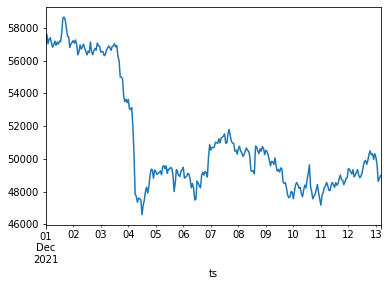

In [10]:
df.set_index('ts')['close'].plot()

## Other Jupyter tricks

Along with executing code blocks, jupyter also has some nice magic functions to help with working in the notebooks.  We've already seem `%matplotlib inline` above, to help inline matplotlib plots

In addition, you can time your code:

In [11]:
# timer for a single line
%time 12 * 23

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs


276

In [13]:
%%timeit -n10
# or for a code block

a = 2
b = 10
for i in range(10):
    a*=a


3.01 µs ± 169 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


you can also get and set environment variables directly:

In [ ]:
%env testval=123

In [14]:
%env

{'TERM_SESSION_ID': 'w0t0p0:5FA6CDA9-F8B8-4EC0-8699-56983775D5C2',
 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.mj1vpIDZxx/Listeners',
 'LC_TERMINAL_VERSION': '3.4.14',
 'COLORFGBG': '15;0',
 'ITERM_PROFILE': 'Default',
 'XPC_FLAGS': '0x0',
 'PWD': '/Users/yangtse/Desktop/test/UCB-MFE-python-preprogram/Lectures/Lecture 2',
 'SHELL': '/bin/zsh',
 '__CFBundleIdentifier': 'com.googlecode.iterm2',
 'TERM_PROGRAM_VERSION': '3.4.14',
 'TERM_PROGRAM': 'iTerm.app',
 'PATH': '/opt/homebrew/Caskroom/miniforge/base/envs/mfe-preprogram/bin:/opt/homebrew/Caskroom/miniforge/base/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin',
 'LC_TERMINAL': 'iTerm2',
 'COLORTERM': 'truecolor',
 'COMMAND_MODE': 'unix2003',
 'TERM': 'xterm-color',
 'HOME': '/Users/yangtse',
 'TMPDIR': '/var/folders/vp/8yvsgr5j2y18rfq3fqynh1zm0000gn/T/',
 'USER': 'yangtse',
 'XPC_SERVICE_NAME': '0',
 'LOGNAME': 'yangtse',
 'ITERM_SESSION_ID': 'w0t0p0:5FA6CDA9-F8B8-4